# Digit Recognition with Simple CNN

# Gerekli Kütüphanelerin Kurulumu

In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


import warnings
warnings.simplefilter(action='ignore', category=Warning)

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


#  Veri Yükleme ve İnceleme

In [2]:
train_data = pd.read_csv("../input/digit-recognizer/train.csv")
test_data = pd.read_csv("../input/digit-recognizer/test.csv")

In [3]:
print(train_data.shape)
print(test_data.shape)

(42000, 785)
(28000, 784)


In [4]:
train_data.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:ylabel='count'>

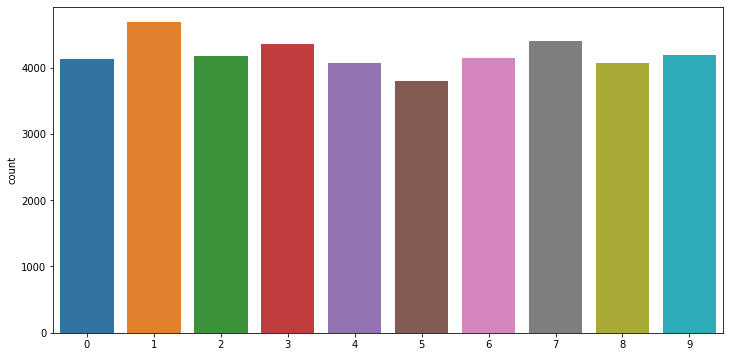

In [5]:
X = train_data.drop(["label"],axis = 1).values
Y = train_data["label"].values
plt.figure(figsize = (12,6))
sns.countplot(Y)

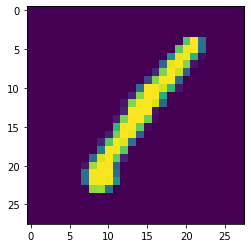

In [6]:
plt.imshow(X[0].reshape([28,28]))

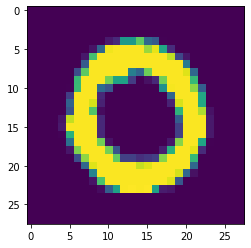

In [7]:
plt.imshow(X[1].reshape([28,28]))

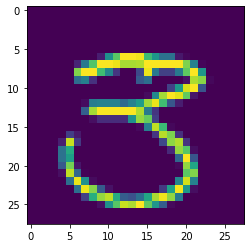

In [8]:
plt.imshow(X[7].reshape([28,28]))

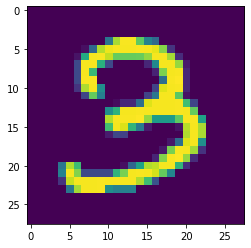

In [9]:
plt.imshow(X[14].reshape([28,28]))

In [10]:
X = X.reshape([42000,28,28,1])
Y = Y.reshape([42000,1])

In [11]:
# convert to one-hot-encoding
from keras.utils.np_utils import to_categorical 
Y = to_categorical(Y, num_classes = 10)

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 14)


In [13]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(37800, 28, 28, 1)
(37800, 10)
(4200, 28, 28, 1)
(4200, 10)


In [14]:
x_train = x_train/255
x_test = x_test/255

# CNN Modelinin Amacı

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), padding = 'same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), padding = 'same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         7

## Modelin Derlenmesi (Optimizer=Adam)

In [17]:
from keras.optimizers import Adam
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

## Learning Rate Reduction

In [18]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.6, 
                                            min_lr=0.00001)

In [19]:
batch_size = 64
epochs = 30

## Data Augmentation

In [20]:
train_datagen = ImageDataGenerator( 
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,
        shear_range = 0.1,
        horizontal_flip=False,  
        vertical_flip=False
        )
train_datagen.fit(x_train)


## Fitting the model

In [21]:
history = model.fit(
            train_datagen.flow(x_train,y_train,batch_size = batch_size),
            validation_data = (x_test,y_test),
            batch_size = batch_size,
            steps_per_epoch = x_train.shape[0]//batch_size,
            epochs = epochs,
            verbose = 1,
            callbacks=[learning_rate_reduction]
            )

Epoch 1/30
590/590 [==============================] - 19s 24ms/step - loss: 1.2180 - accuracy: 0.5601 - val_loss: 0.0766 - val_accuracy: 0.9748
Epoch 2/30
590/590 [==============================] - 14s 24ms/step - loss: 0.1810 - accuracy: 0.9469 - val_loss: 0.0498 - val_accuracy: 0.9850
Epoch 3/30
590/590 [==============================] - 14s 24ms/step - loss: 0.1253 - accuracy: 0.9635 - val_loss: 0.0520 - val_accuracy: 0.9836
Epoch 4/30
590/590 [==============================] - 14s 23ms/step - loss: 0.1093 - accuracy: 0.9684 - val_loss: 0.0357 - val_accuracy: 0.9890
Epoch 5/30
590/590 [==============================] - 14s 24ms/step - loss: 0.0981 - accuracy: 0.9717 - val_loss: 0.0391 - val_accuracy: 0.9881
Epoch 6/30
590/590 [==============================] - 14s 23ms/step - loss: 0.0886 - accuracy: 0.9749 - val_loss: 0.0447 - val_accuracy: 0.9867
Epoch 7/30
590/590 [==============================] - 14s 24ms/step - loss: 0.0860 - accuracy: 0.9763 - val_loss: 0.0348 - val_accuracy:

## Evaluation and Accuracy,Loss plots

In [22]:
model.evaluate(x_test,y_test)

132/132 [==============================] - 1s 6ms/step - loss: 0.0258 - accuracy: 0.9933


[0.02576344646513462, 0.9933333396911621]

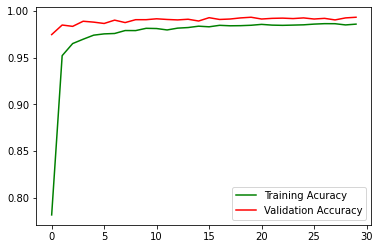

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(acc,color = 'green',label = 'Training Acuracy')
plt.plot(val_acc,color = 'red',label = 'Validation Accuracy')
plt.legend()

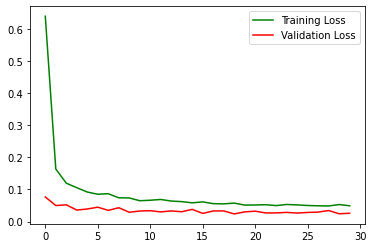

In [24]:
plt.figure()
plt.plot(loss,color = 'green',label = 'Training Loss')
plt.plot(val_loss,color = 'red',label = 'Validation Loss')
plt.legend()

In [25]:
data = test_data.values
data = data.reshape([28000,28,28,1])
print(data.shape)
data = data/255

(28000, 28, 28, 1)


In [26]:
test_pred = model.predict(data)
test_pred = np.argmax(test_pred,axis=1)
print(test_pred.shape)

(28000,)


In [27]:
sample_submission = pd.read_csv("../input/digit-recognizer/sample_submission.csv")
sample_submission

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


In [28]:
index = sample_submission.ImageId
data = {'ImageId' : index,'Label': test_pred}
df = pd.DataFrame(data)
df.head

<bound method NDFrame.head of        ImageId  Label
0            1      2
1            2      0
2            3      9
3            4      0
4            5      3
...        ...    ...
27995    27996      9
27996    27997      7
27997    27998      3
27998    27999      9
27999    28000      2

[28000 rows x 2 columns]>

In [29]:
df.to_csv('submission2.csv', index=False)